In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os
import json
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

2-26-26 Updating with latest data update from NACC (December 2025)

In [2]:
old_ids = pd.read_csv('old/unique_ids.txt')
new_df = pd.read_csv('investigator_ftldlbd_nacc72.csv')

/var/folders/j5/6cc1s4850711ycqjnnzgj1j00000gp/T/ipykernel_37066/661549781.py:2: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010,1029,1034,1204,1208,1211,1407,1409,1411,1412,1414,1421,1423,1425,1426,1433,1435,1437,1439,1440,1447,1462,1476,1490,1504,1506,1542,1558,1560,1562,1564,1566,1568,1570,1572,1574,1576,1578,1580,1582,1584,1586,1588,1590,1592,1594,1596,1598,1600,1602,1604,1606,1608,1610,1612,1662,1663,1665,1666,1669,1670,1673,1674,1677,1678,1681,1682,1756,1815,1824,1826,1828,1830,1841,1843,1845,1853,1855,1857,1859,1867,1869,1871,1873,1899) have m

In [3]:
new_ids = new_df['NACCID']
new_ids.head()

old_id_column = old_ids.columns[0]
old_id_set = set(old_ids[old_id_column])

# Find new IDs that are not in the old set
new_id_set = set(new_ids)
truly_new_ids = new_id_set - old_id_set

print(f"Number of new IDs: {len(truly_new_ids)}")
print(f"Total unique IDs in new_df: {len(new_id_set)}")
print(f"Total IDs in old_ids: {len(old_id_set)}")



Number of new IDs: 2808
Total unique IDs in new_df: 55268
Total IDs in old_ids: 52536


Numeric counts of the highest NACCVNUM obtained:
NACCVNUM
1     17333
2      9962
3      6922
4      4986
5      3639
6      2980
7      2395
8      1586
9      1241
10      994
11      840
12      649
13      544
14      354
15      289
16      218
17      155
18      118
19       48
20       15
Name: count, dtype: int64


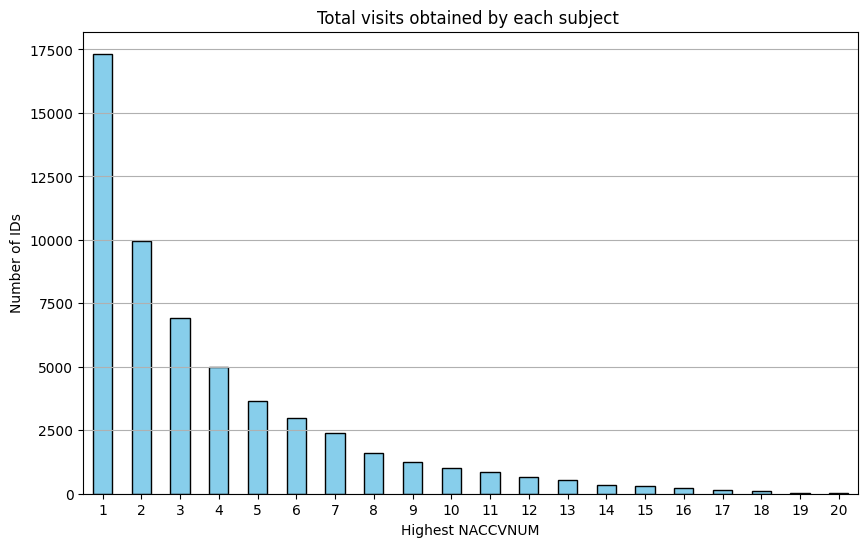

In [4]:
id = 'NACCID'
num_visits = 'NACCVNUM'

max_visits = new_df.groupby(id)[num_visits].max()
naccvnum_counts = max_visits.value_counts()

print("Numeric counts of the highest NACCVNUM obtained:")
print(naccvnum_counts)

# Create a histogram
plt.figure(figsize=(10, 6))
naccvnum_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Highest NACCVNUM')
plt.ylabel('Number of IDs')
plt.title('Total visits obtained by each subject ')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [5]:

id = 'NACCID'
CN = 'NORMCOG'
AD = 'NACCALZP'
MCI = 'NACCUDSD'
MCI_TYPE = 'NACCTMCI'

# Calculate the proportions of each subgroup
cn_proportion = new_df[CN].value_counts(normalize=True)
ad_proportion = new_df[AD].value_counts(normalize=True)
mci_proportion = new_df[MCI].value_counts(normalize=True)
mci_type_proportion = new_df[MCI_TYPE].value_counts(normalize=True)

# Print the proportions
print("Proportion of CN (Normal Cognition):")
print(cn_proportion)
print("\nProportion of AD (Alzheimer's Disease):")
print(ad_proportion)
print("\nProportion of MCI (Mild Cognitive Impairment):")
print(mci_proportion)
print("\nProportion of MCI_TYPE (Mild Cognitive Impairment Type):")
print(mci_type_proportion)

Proportion of CN (Normal Cognition):
NORMCOG
0    0.50911
1    0.49089
Name: proportion, dtype: float64

Proportion of AD (Alzheimer's Disease):
NACCALZP
8    0.490890
1    0.323460
7    0.167218
2    0.018197
3    0.000236
Name: proportion, dtype: float64

Proportion of MCI (Mild Cognitive Impairment):
NACCUDSD
1    0.490890
4    0.288237
3    0.176603
2    0.044270
Name: proportion, dtype: float64

Proportion of MCI_TYPE (Mild Cognitive Impairment Type):
NACCTMCI
8    0.823397
2    0.083879
1    0.056682
3    0.022101
4    0.013940
Name: proportion, dtype: float64


In [6]:
unique_ids = new_df[id].unique()

unique_ids_df = pd.DataFrame(unique_ids, columns=['NACCID'])

unique_ids_df.to_csv('unique_idsv2.txt', index=False, header=False)


In [ ]:
from preprocessing import build_response_sequences, summarise_sequences

response_sequences = build_response_sequences(new_df, id_col='NACCID', coding_key='standard', save_csv='response_sequences.csv')
response_sequences = build_response_sequencesdem(new_df, id_col='NACCID', coding_key='cn_mci_dementia', save_csv='response_sequences_cn_mci_dementia.csv')

summary = summarise_sequences(response_sequences, save_csv='response_sequences_summary.csv')
print(summary.to_string(index=False))
summary = summarise_sequences(response_sequencesdem, save_csv='response_sequencesdem_summary.csv')
print(summary.to_string(index=False))

/Users/aeg00011/Desktop/AD-Research/AD-Early-Prediction/preprocessing.py:85: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: [label_visit(row, rules) for _, row in grp.iterrows()])


Saved → response_sequences.csv
Saved → response_sequences_cn_mci_dementia.csv


/Users/aeg00011/Desktop/AD-Research/AD-Early-Prediction/preprocessing.py:85: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: [label_visit(row, rules) for _, row in grp.iterrows()])
